In [51]:
# PROJET4_DATA_ANALYSIS_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET4//DAN-P4-FAO//P4_LABO')

In [52]:
# IMPORTATION DES BIBLIOTHEQUES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# IMPORTATION DES DONNEES DE LA POPULATION.

data_pop_df = pd.read_csv('CSV_DATA/population.csv')               

# CONVERTIR DE MILLIERS EN MILLIONS D'UNITES, LA POPULATION DU PAYS;

data_pop_df['Valeur'] = data_pop_df['Valeur']/1000            

# RENOMMONS LA COLONNE VALEUR AFIN D'OBTENIR UNE NOUVELLE UNITE DE LA POPULATION.

data_pop_df.rename(columns = {'Valeur' : 'Population(Millions)'}, inplace = True)  

# POSONS 2017 COMME L'ANNEE DE BASE.

annee_base                =    data_pop_df['Année'] == 2017

filt_data_pop_df_2017     =    data_pop_df[annee_base]

In [54]:
# IMPORTATION DES DONNEES DE LA SOUS-NUTRITION.

data_sous_nut_df = pd.read_csv('CSV_DATA/sous_nutrition.csv')     

# RENOMMONS LA COLONNE VALEUR AFIN D'OBTENIR UNE NOUVELLE UNITE DE LA SOUS-NUTRITION DE LA POPULATION.

data_sous_nut_df.rename(
    columns = {'Valeur' : 'Population sous-alimentée(Millions)'}, 
   inplace = True) 

# PROCEDONS AU SPLIT DE LA  COLONNE ANNEE, AFIN DE FILTRER L'ANNEE MOYENNE.

data_sous_nut_df[['A1', 'A2']] = data_sous_nut_df['Année'].str.split('-', expand=True)

data_sous_nut_df['A1']         = data_sous_nut_df['A1'].astype('int64')

data_sous_nut_df['A2']         = data_sous_nut_df['A2'].astype('int64')

data_sous_nut_df['Année']      = ((data_sous_nut_df['A1']+data_sous_nut_df['A2'])/2).astype('int64')

data_sous_nut_df.drop(columns  = ['A1', 'A2'], inplace=True)

annee_base2                    = data_sous_nut_df['Année'] == 2017

filt_data_sous_nut_df_2017          = data_sous_nut_df[annee_base2]

In [55]:
# JOINTURE DES DATAFRAMES data_pop_df ET data_sous_nut_df: AYANT LES INTITULES, UTILISER LA JOINTURE GAUCHE.

data_pop_sous_nt_df = pd.merge(filt_data_pop_df_2017, filt_data_sous_nut_df_2017, on = ['Zone', 'Année'], how = 'left') 

In [56]:
# TRAITEMENT & NETTOYAGE DES DONNEES. LES VALEURS NAN, DEUX CAS: I LES SUPPRIMER; II) LES REMPLACER PAR 0.

# CASI: LES SUPPRIMER. 
    
data_pop_sous_nt_dfna = data_pop_sous_nt_df.dropna(axis = 0, how = 'any')  # à utiliser pour la question1
    
# REDEFINISSONS LES TAILLES DES DIFFERENTES POPULATIONS SOUS-ALIMENTEES AVEC ET SANS VALEURS MANQUANTES (NAN):

#  1-  TAILLE DE LA POPULATION SOUS-ALIMENTEE SANS VALEURS MANQUANTES (NAN): 624 PERSONNES.

len_data_pop_sous_nt_dfna   =  len(data_pop_sous_nt_dfna)
    
#  2-  TAILLE DE LA POPULATION SOUS-ALIMENTEE AVEC LES VALEURS MANQUANTES (NAN):1218 PERSONNES.

len_data_pop_sous_nt_df   =  len(data_pop_sous_nt_df)  
    
#  3- PROPORTION DES PERSONNES EN ETAT DE SOUS-NUTRITION PERDUE: # 51.23% 

print(
'proportion de personnes en état de sous-nutrition perdue : {:.2f}%'
.format(len_data_pop_sous_nt_dfna / len_data_pop_sous_nt_df*100)
)

# QUE FAIRE DES VALEURS < 0.1? DEUX SITUATIONS: LES REMPLACER PAR 0.09 ET 0.

# CAS1: LES REMPLACER PAR 0.09

#data_pop_sous_nt_dfna['Population sous-alimentée(Millions)']   =  (
#    data_pop_sous_nt_dfna['Population sous-alimentée(Millions)']
#    .str
#    .replace('<0.1', '0.09')
#    .astype('float')
#)

# CAS2: LES REMPLACER PAR 0

data_pop_sous_nt_dfna['Population sous-alimentée(Millions)']   =  (
    data_pop_sous_nt_dfna['Population sous-alimentée(Millions)']
    .str
    .replace('<0.1', '0')
    .astype('float')
)

proportion de personnes en état de sous-nutrition perdue : 44.07%


<ipython-input-56-1094bee2b46b>:38: FutureWarning: The default value of regex will change from True to False in a future version.
  data_pop_sous_nt_dfna['Population sous-alimentée(Millions)']
<ipython-input-56-1094bee2b46b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop_sous_nt_dfna['Population sous-alimentée(Millions)']   =  (


In [57]:
# DETERMINONS LA POPULATION ET LA POPULATION SOUS-ALIMENTEE EN 2017 SANS VALEURS MANQUANTES (NaN) ET AVEC 0.09.

# LA POPULATION MONDIALE TOTALE EN 2017 SANS VALEURS MANQUANTES (NaN): 4182.831358 MILLIONS

population_2017    =  data_pop_sous_nt_dfna['Population(Millions)'].sum()

print('Total Population Mondiale en 2017 :{:2f} Millions '.format(population_2017))

# LA POPULATION MONDIALE SOUS-ALIMENTEE EN 2017 SANS VALEURS MANQUANTES (NaN) ET VALEURS <0.1-->0.09: 537.500000 MILLIONS

#sous_nutrition_2017  =  data_pop_sous_nt_dfna['Population sous-alimentée(Millions)'].sum()

#print('Total Population Mondiale en sous-nutrition en 2017 :{:2f} Millions '. format(sous_nutrition_2017))

# LA POPULATION MONDIALE SOUS-ALIMENTEE EN 2017 SANS VALEURS MANQUANTES (NaN) ET VALEURS <0.1-->0: 535.700000 MILLIONS

sous_nutrition_2017  =  data_pop_sous_nt_dfna['Population sous-alimentée(Millions)'].sum()

print('Total Population Mondiale en sous-nutrition en 2017 :{:2f} Millions '. format(sous_nutrition_2017))

Total Population Mondiale en 2017 :4182.831358 Millions 
Total Population Mondiale en sous-nutrition en 2017 :535.700000 Millions 


Proportion des personnes en état de sous-nutrition dans le Monde en 2017 : 12.81%


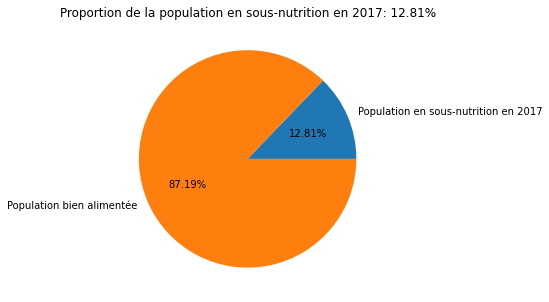

In [58]:
# LA PROPORTION DES PERSONNES DANS LE MONDE EN ETAT DE SOUS-NUTRITION EN 2017 SANS NAN ET AVEC VALEURS <0.1-->0.09: 12.85%

#prop_sous_nt     = sous_nutrition_2017/population_2017

#print(
#'Proportion des personnes en état de sous-nutrition dans le Monde en 2017 : {:.2f}%'
#.format(sous_nutrition_2017/population_2017*100))

# LA PROPORTION DES PERSONNES DANS LE MONDE EN ETAT DE SOUS-NUTRITION EN 2017 SANS NAN ET AVEC VALEURS <0.1-->0: 12.81%

prop_sous_nt     = sous_nutrition_2017/population_2017

print(
'Proportion des personnes en état de sous-nutrition dans le Monde en 2017 : {:.2f}%'
.format(sous_nutrition_2017/population_2017*100))

# GRAPHIQUE1: POPULATION EN SOUS-NUTRITION EN 2017.

plt.figure(figsize = (5,5))
plot = plt.pie(
[prop_sous_nt, 1-prop_sous_nt],
labels = ['Population en sous-nutrition en 2017', 'Population bien alimentée'],
autopct = lambda x : str(round(x,2)) + '%'
)
plot = plt.title('Proportion de la population en sous-nutrition en 2017: 12.81%')

In [59]:
# CASII: LES REMPLACER PAR 0.

data_pop_sous_nt_df.fillna(0, inplace=True)       

# QUE FAIRE DES VALEURS < 0.1? DEUX SITUATIONS: LES REMPLACER PAR 0.09 ET 0.

# CAS1: LES REMPLACER PAR 0.09

#data_pop_sous_nt_df['Population sous-alimentée(Millions)']   =  (
#    data_pop_sous_nt_df['Population sous-alimentée(Millions)']
#    .str
#    .replace('<0.1', '0.09')
#    .astype('float')
#)

# CAS2: LES REMPLACER PAR 0

data_pop_sous_nt_df['Population sous-alimentée(Millions)']   =  (
    data_pop_sous_nt_df['Population sous-alimentée(Millions)']
    .str
    .replace('<0.1', '0')
    .astype('float')
)

<ipython-input-59-257aa18b1e6c>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data_pop_sous_nt_df['Population sous-alimentée(Millions)']


In [60]:
# DETERMINONS LA POPULATION ET LA POPULATION SOUS-ALIMENTEE EN 2017.

# LA POPULATION MONDIALE TOTALE EN 2017: 7543.798779 MILLIONS.

population_2017    =  data_pop_sous_nt_df['Population(Millions)'].sum()

print('Total Population Mondiale en 2017 :{:2f} Millions '
      .format(population_2017))

# LA POPULATION MONDIALE SOUS-ALIMENTEE EN 2017 AVEC VALEURS <0.1-->0.09: 537.500000 MILLIONS

#sous_nutrition_2017  =  data_pop_sous_nt_df['Population sous-alimentée(Millions)'].sum()

#print('Total Population Mondiale en sous-nutrition en 2017 :{:2f} Millions '. format(sous_nutrition_2017))

# LA POPULATION MONDIALE SOUS-ALIMENTEE EN 2017 AVEC VALEURS <0.1-->0: 535.700000 MILLIONS

sous_nutrition_2017  =  data_pop_sous_nt_df['Population sous-alimentée(Millions)'].sum()

print('Total Population Mondiale en sous-nutrition en 2017 :{:2f} Millions '. format(sous_nutrition_2017))

Total Population Mondiale en 2017 :7548.134111 Millions 
Total Population Mondiale en sous-nutrition en 2017 :535.700000 Millions 


Proportion des personnes en état de sous-nutrition dans le Monde en 2017 : 7.10%


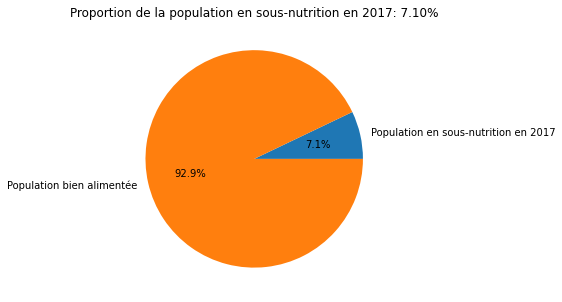

In [61]:
# LA PROPORTION DES PERSONNES DANS LE MONDE EN ETAT DE SOUS-NUTRITION EN 2017 ET AVEC VALEUR<0.1--->0.09: 7.13%

#prop_sous_nt     = sous_nutrition_2017/population_2017

#print(
#'Proportion des personnes en état de sous-nutrition dans le Monde en 2017 : {:.2f}%'
#.format(sous_nutrition_2017/population_2017*100))

# LA PROPORTION DES PERSONNES DANS LE MONDE EN ETAT DE SOUS-NUTRITION EN 2017  ET 0: 7.10%

prop_sous_nt     = sous_nutrition_2017/population_2017

print(
'Proportion des personnes en état de sous-nutrition dans le Monde en 2017 : {:.2f}%'
.format(sous_nutrition_2017/population_2017*100))

# GRAPHIQUE2: POPULATION EN SOUS-NUTRITION EN 2017.

plt.figure(figsize = (5,5))
plot = plt.pie(
[prop_sous_nt, 1-prop_sous_nt],
labels = ['Population en sous-nutrition en 2017', 'Population bien alimentée'],
autopct = lambda x : str(round(x,2)) + '%'
)
plot = plt.title('Proportion de la population en sous-nutrition en 2017: 7.10%')

Nombre théorique de personnes qui pourraient être nourries 9297326501
Population mondiale en 2017 7548134111
Proportion de personnes qui pourraient être nourries 123.17%


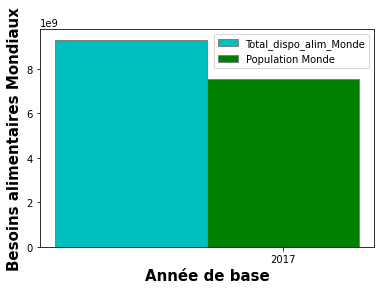

In [62]:
# QUESTION2: LE NOMBRE THEORIQUE DE PERSONNE QUI POURAIENT ËTRE NOURRIES

# IMPORTATION DES DONNEES RELATIVES A LA DISPONIBILITE ALIMENTAIRE MONDIALE.

data_dispo_alim  = pd.read_csv('CSV_DATA/dispo_alimentaire.csv')

# SELECTION DES DONNEES NECESSAIRES A NOTRE ETUDE.

data_dispo_alim_df  =  (data_dispo_alim.drop([
    'Aliments pour animaux',
    'Autres Utilisations',
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité de matière grasse en quantité (g/personne/jour)',
    'Disponibilité de protéines en quantité (g/personne/jour)',
    'Disponibilité intérieure',
    'Exportations - Quantité',
    'Importations - Quantité',
    'Nourriture',
    'Pertes',
    'Production',
    'Semences',
    'Traitement',
    'Variation de stock'],
    axis=1))

# PROCEDONS AU GROUPEMENT DE LA DISPONIBILITE ALIMENTAIRE KCAL/PERS/JOUR ET PAR PAYS.

grpe_pays  =  data_dispo_alim_df.groupby('Zone')

# DETERMINONS LA DISPONIBILTE ALIMENTAIRE (KCAL/PERSONNE/JOUR) DU GROUPE DES PAYS.

data_dispo_alim_df2  = (pd.DataFrame(grpe_pays['Disponibilité alimentaire (Kcal/personne/jour)']
                                    .sum()
                                    .reset_index()))

# JOINTURE DE LA POPULATION ET DE LA DISPONIBILITE ALIMENTAIRE DU MONDE: JOINTURE GAUCHE.

data_pop_dispo_alim_df    =  pd.merge(filt_data_pop_df_2017, data_dispo_alim_df2, on = 'Zone', how = 'left')

# DETERMINONS LA DISPONIBILITE ALIMENTAIRE MONDIALE TOTALE.

data_pop_dispo_alim_df['Total_dispo_alim']   =  (data_pop_dispo_alim_df['Population(Millions)']
                                         * data_pop_dispo_alim_df['Disponibilité alimentaire (Kcal/personne/jour)']
                                         * 1_000_000)

# DETERMINONS LE NOMBRE THEORIQUE DES PERSONNE QUI POURRAIENT ETRE NOURRIES: EN MOYENNE 2250 KCAL/PERSONNE/JOUR.

nbre_theo_pers      =    (data_pop_dispo_alim_df['Total_dispo_alim'].sum()) / 2250

print('Nombre théorique de personnes qui pourraient être nourries {:.0f}'
     .format(nbre_theo_pers))

print('Population mondiale en 2017 {:.0f}'
     .format(population_2017*1_000_000))

print('Proportion de personnes qui pourraient être nourries {:.2f}%'
     .format(nbre_theo_pers / (population_2017*1_000_000)*100))

# GRAPHIQUE3:NOMBRE THEORIQUE DE PERSONNE QUI POURRAIENT ETRE NOURRIES.
barWidth           =    0.9
fig                =    plt.plot(figsize = (12, 8))
Total_dispo_alim   =    [9297326501]
Population         =    [7548134111]
br1                =    np.arange(len(Total_dispo_alim))
br2                =    [x + barWidth for x in br1] 
plt.bar(br1, Total_dispo_alim, color = 'c', width = barWidth,
        edgecolor = 'grey', label = 'Total_dispo_alim_Monde')
plt.bar(br2, Population, color ='g', width = barWidth,
        edgecolor = 'grey', label = 'Population Monde')
plt.xlabel('Année de base', fontweight = 'bold', fontsize = 15)
plt.ylabel('Besoins alimentaires Mondiaux', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Total_dispo_alim))], 
           ['2017'])
plt.legend()
plt.show()

Nombre théorique de personnes qui pourraient être nourries seulement avec les produits végétaux 7671450761
Proportion de personnes qui théoriquement pourraient être nourries seulement avec les produits végétaux 101.63%


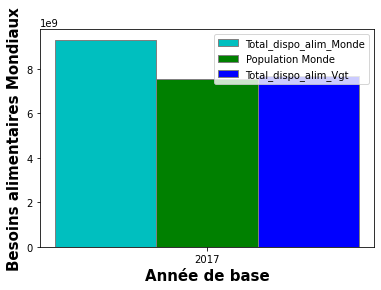

In [63]:
# QUESTION3: IDEM POUR LA DISPONIBILITE ALIMENTAIRE DES PRODUITS VEGETAUX.

# FILTRONS LA DISPONIBILITE ALIMENTAIRE D'ORIGINE VEGETALE.

origine_base   =   data_dispo_alim_df['Origine'] == 'vegetale'

# REINITIALISONS L'INDEX DANS LE FILTRE VEGETAL.

filt_vgt   =  pd.DataFrame(data_dispo_alim_df[origine_base].reset_index())

# GROUPONS LA DISPONIBILITE ALIMENTAIRE VEGETALE PAR PAYS.

grpe_pays_vgt     =    filt_vgt.groupby('Zone')

# DETERMINONS LA DISPONIBILTE ALIMENTAIRE (KCAL/PERSONNE/JOUR) D'ORIGINE VEGETALE DU GROUPE DES PAYS.

data_dispo_alim_vgt_df2  = (pd.DataFrame(grpe_pays_vgt['Disponibilité alimentaire (Kcal/personne/jour)']
                                    .sum()
                                    .reset_index()))

# JOINTURE DE LA POPULATION ET DE LA DISPONIBILITE ALIMENTAIRE VEGETALE DU MONDE: JOINTURE GAUCHE.

data_pop_dispo_alim_vgt_df    =  pd.merge(filt_data_pop_df_2017, data_dispo_alim_vgt_df2, on = 'Zone', how = 'left')

# DETERMINONS LA DISPONIBILITE ALIMENTAIRE VEGETALE MONDIALE TOTALE.

data_pop_dispo_alim_vgt_df['Total_dispo_alim']   =  (data_pop_dispo_alim_vgt_df['Population(Millions)']
                                         * data_pop_dispo_alim_vgt_df['Disponibilité alimentaire (Kcal/personne/jour)']
                                         * 1_000_000)

# DETERMINONS LE NOMBRE THEORIQUE DES PERSONNE QUI POURRAIENT ETRE NOURRIES SEULEMENT AVEC DES PRODUITS VEGETAUX.

nbre_theo_pers_vgt      =    (data_pop_dispo_alim_vgt_df['Total_dispo_alim'].sum()) / 2250

print('Nombre théorique de personnes qui pourraient être nourries \
seulement avec les produits végétaux {:.0f}'
     .format(nbre_theo_pers_vgt))

print('Proportion de personnes qui théoriquement pourraient être nourries \
seulement avec les produits végétaux {:.2f}%'
     .format(nbre_theo_pers_vgt / (population_2017*1_000_000)*100))

# GRAPHIQUE4:NOMBRE THEORIQUE DE PERSONNE QUI POURRAIENT ETRE NOURRIES AVEC LES SEULS PRODUITS VEGETAUX.
barWidth                =    0.9
fig                     =    plt.plot(figsize = (12, 8))
Total_dispo_alim        =    [9297326501]
Population              =    [7548134111]
Total_dispo_alim_Vgt    =    [7671450761] 
br1                     =    np.arange(len(Total_dispo_alim))
br2                     =    [x + barWidth for x in br1] 
br3                     =    [x + barWidth for x in br2]
plt.bar(br1, Total_dispo_alim, color = 'c', width = barWidth,
        edgecolor = 'grey', label = 'Total_dispo_alim_Monde')
plt.bar(br2, Population, color ='g', width = barWidth,
        edgecolor = 'grey', label = 'Population Monde')
plt.bar(br3, Total_dispo_alim_Vgt, color = 'b', width = barWidth,
        edgecolor = 'grey', label = 'Total_dispo_alim_Vgt')
plt.xlabel('Année de base', fontweight = 'bold', fontsize = 15)
plt.ylabel('Besoins alimentaires Mondiaux', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Total_dispo_alim))], 
           ['2017'])
plt.legend()
plt.show()

L'utilisation de la disponibilité intérieure se répartit comme suit :
- alimentation humaine 49.51%
- alimentation animale 13.24%
- alimentation perdue 4.61%
- le reste se répartit entre d'autres utilisations(dont Autres, Semences et Traitement) 32.74%


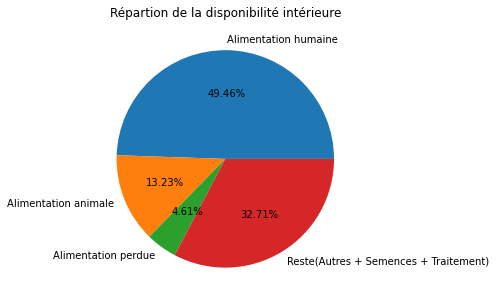

In [64]:
# QUESTION4:L'UTILISATION DE LA DISPONIBILITE INTERIEURE: LA PART ATTRIBUEE A L'ALIMENTATION ANIMALE, CELLE PERDUE, CELLE 

# CONCRETEMENT UTILISEE POUR L'ALIMENTATION HUMAINE.

# DISPONIBILITE INTERIEURE = ALIMENTS POUR ANIMAUX + AUTRE + NOURRITURE + PERTES + SEMENCES + TRAITEMENT

# DISPONIBILITE INTERIEURE =  PRODUCTION + IMPORTATION - EXPORTATIONS + VARIATION DE STOCK

# SELECTION DES DONNEES NECESSAIRES A NOTRE ETUDE.

dispo_int   =    data_dispo_alim.drop(['Produit',
                               'Origine',
                               'Disponibilité alimentaire (Kcal/personne/jour)',
                               'Disponibilité alimentaire en quantité (kg/personne/an)',
                               'Disponibilité de matière grasse en quantité (g/personne/jour)',
                               'Disponibilité de protéines en quantité (g/personne/jour)'],
                              axis=1)

# DETERMINONS LA DISPONIBILITE ALIMENTAIRE INTERIEURE TOTALE ET SA REPARTITION.

# DETERMINONS LA DISPONIBILITE ALIMENTAIRE INTERIEURE TOTALE.

Total_dispo_int   =   dispo_int['Disponibilité intérieure'].sum()

# DETERMINONS L'ALIMENTATION HUMAINE.

Alim_hum     =        dispo_int['Nourriture'].sum() /  Total_dispo_int * 100

# DETERMINONS L'ALIMENTATION POUR LES ANIMAUX.

Alim_anim       =     dispo_int['Aliments pour animaux'].sum() /  Total_dispo_int * 100

# DETERMINONS LA SOMME DES PERTES INDUITES.

Pertes       =     dispo_int['Pertes'].sum() /  Total_dispo_int * 100

# DETERMINONS L'ALIMENTATION DESTINEE A D'AUTRES UTILISATIONS.

Autres        =        dispo_int['Autres Utilisations'].sum() /  Total_dispo_int * 100

# DETERMINONS L'ALIMENTATYION DESTINEE AUX SEMENCES.

Semences           =          dispo_int['Semences'].sum() /  Total_dispo_int * 100

# DETERMINONS L'ALIMENTATION DESTINEE AU TRAITEMENT.

Traitement          =            dispo_int['Traitement'].sum() /  Total_dispo_int * 100 

# IMPRIMONS LA REPARTITION DE LA DISPONIBILITE ALIMENTAIRE INTERIEURE.

print("L'utilisation de la disponibilité intérieure se répartit comme suit :")

print("- alimentation humaine {:.2f}%".format(Alim_hum))

print("- alimentation animale {:.2f}%".format(Alim_anim))

print("- alimentation perdue {:.2f}%".format(Pertes))

print("- le reste se répartit entre d'autres utilisations(dont Autres, Semences et Traitement) {:.2f}%"
      .format(Autres + Semences + Traitement))

# GRAPHIQUE5: REPARTITION DE LA DISPONIBILITE ALIMENTAIRE INTERIEURE.

alim_hum                     =   0.4951

alim_anim                    =   0.1324

pertes                       =   0.0461

reste                        =   0.3274

plt.figure(figsize = (5,5))

plot = plt.pie(
[0.4951, 0.1324, 0.0461, 0.3274],
labels = ['Alimentation humaine', 'Alimentation animale','Alimentation perdue', 'Reste(Autres + Semences + Traitement)'],
autopct = lambda x : str(round(x,2)) + '%'
)

plot = plt.title('Répartion de la disponibilité intérieure')

Utilisation des céréales pour l'alimentation animale: 62.12%
Utilisation des céréales pour l'alimentation humaine: 26.28%


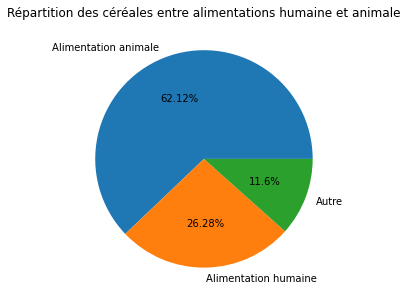

In [65]:
# NOTE1 DE JULIEN: L'UTILISATION ET LA REPARTITION DES CEREALES ENTRE LES ALIMENGTATIONS HUMAINE ET ANIMALE.

# IMPORTATION DES DONNEES RELATIVES AUX CEREALES SUR LE SITE DU FAO.

data_cereales    = pd.read_csv(
    'CSV_DATA/BilansAlimentaires_F_Toutes_les_Données.csv',
    sep=',',
    encoding='latin1'
)

# DEFINISSONS Cprod_base COMME CONSTITUE DES CEREALES ET DES AUTRES PRODUITS DANS LA BASE DE DONNEES data_cereales.

Cprod_base     =        data_cereales['Produit'] == 'Céréales, Autres'

# DETERMINONS LES CEREALES EN FONCTION DE ÉLÉMENT ET Y2017.

cereales     =     data_cereales.loc[
    (Cprod_base),
    ['Élément', 'Y2017']
]

# RENOMMONS la colonne Y2017 EN FONCTION DE CEREALES (Milliers de tonnes).

cereales    =  cereales.rename(columns = {'Y2017': 'Céréales (Milliers de tonnes)'})

# PROCEDONS MAINTENANT A LA REPARTITION DES CEREALES EN TERMES DE POURCENTAGES.

# QUANTITE DES CEREALES ALLOUEE A L'ALIMENTATION ANIMALE.

Cereales_anim_base      =    cereales['Élément'] == 'Aliments pour animaux'

# QUANTITE DE CEREALES ALLOUEE A DISPONIBILITE INTERIEURE.

Cereales_dispo_int_base    = cereales['Élément'] == 'Disponibilité intérieure'

# POURCENTAGE DE CEREALES ALLOUEE A L'ALIMENTATION ANIMALE.

cereales_anim    =    cereales[Cereales_anim_base]['Céréales (Milliers de tonnes)'].sum() \
/ cereales[Cereales_dispo_int_base]['Céréales (Milliers de tonnes)'].sum() * 100

# QUANTITE DE CEREALES ALLOUEE A L'ALIMENTATION HUMAINE.

Cereales_nour_base        =     cereales['Élément'] == 'Nourriture'

# POURCENTAGE DE CEREALES ALLOUEE A L'ALIMENTATION HUMAINE.

cereales_hum        =      cereales[Cereales_nour_base]['Céréales (Milliers de tonnes)'].sum() \
/ cereales[Cereales_dispo_int_base]['Céréales (Milliers de tonnes)'].sum() * 100

# IMPRIMONS LA RFEPARTITION FINALE DES CEREALES ENTRE LES ALIMENTATIONS HUMAINE ET ANIMALE.

print("Utilisation des céréales pour l'alimentation animale: {:.2f}%".format(cereales_anim))

print("Utilisation des céréales pour l'alimentation humaine: {:.2f}%".format(cereales_hum))

# GRAPHIQUE6: REPARTITION DES CEREALES ENTRE LES ALIMENTATIONS HUMAINE ET ANIMALE.

prop_cer_anim                 =  0.6212

prop_cer_hum                  =  0.2628

prop_cer_autre                =  0.1160

plt.figure(figsize = (5,5))

plot = plt.pie(
[0.6212, 0.2628, 0.1160],
labels = ['Alimentation animale', 'Alimentation humaine', 'Autre'],
autopct = lambda x : str(round(x,2)) + '%'
)    
plot = plt.title('Répartition des céréales entre alimentations humaine et animale')

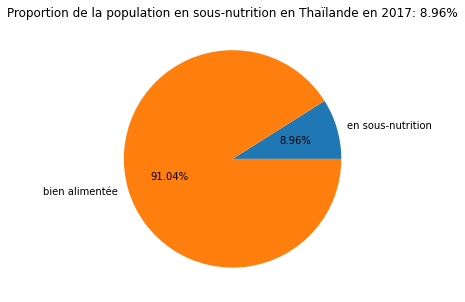

In [66]:
# NOTE2 DE JULIEN: EXPORTATION DE LA PRODUCTION DU MANIOC DE LA THAILANDE FACE A LA SOUS-NUTRITION DE SA POPULATION.

# DETERMINONS LA POPULATION THAILANDAISE EN ETAT DE SOUS-NUTRITION.

thlde_base     =     filt_data_pop_df_2017['Zone'] =='Thaïlande'

# FILTRONS LA POPULATION THAILANDAISE POUR L'ANNEE 2017.

#pop_thlde    =     filt_data_pop_df_2017[thlde_base]

thlde         =     filt_data_pop_df_2017[thlde_base]

# JOINTURE DE LA POPULATION FILTREE ET DE LA SOUS-NUITRITION AFIN D'OBTENIR LA POPULATION EN ETAT DE SOUS-NUTRITION EN THAILANDE.

thlde                     = thlde.merge(
    filt_data_sous_nut_df_2017[['Zone', 'Population sous-alimentée(Millions)']],
    on = 'Zone',
    how = 'left'
)
    
thlde.head()    

# GRAPHIQUE7: POPULATION EN SOUS-NUTRITION EN THAÏLANDE EN 2017.

prop_sous_nt_thlde     = 6.2/69.20981

plt.figure(figsize = (5,5))
plot = plt.pie(
[prop_sous_nt_thlde, 1-prop_sous_nt_thlde],
labels = ['en sous-nutrition', 'bien alimentée'],
autopct = lambda x : str(round(x,2)) + '%'
)
plot = plt.title('Proportion de la population en sous-nutrition en Thaïlande en 2017: 8.96%')

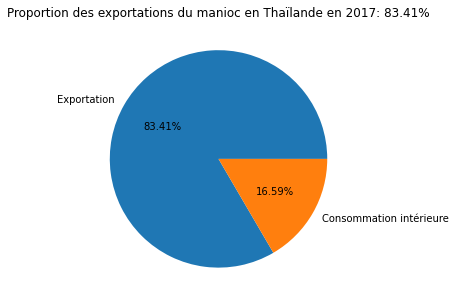

In [67]:
# EXAMINONS MAINTENANT L'USAGE DU MANIOC EN THAILANDE.

# FILTRONS LES DISPONIBILITES ALIMENTAIRES DE LA THAILANDE COMME PAYS ET DU MANIOC EN THAILANDE.

filt_thlde            =   data_dispo_alim['Zone'] == 'Thaïlande'

filt_manioc           =   data_dispo_alim['Produit'] == 'Manioc'

dispo_manioc          =   data_dispo_alim[filt_thlde & filt_manioc].loc[:,
                                                                       ['Zone',
                                                                       'Produit',
                                                                       'Exportations - Quantité',
                                                                       'Importations - Quantité',
                                                                       'Production']]

# POURCENTAGE DES EXPORTATIONS DU MANIOC PAR RAPPORT A LA PRODUCTION TOTALE DU MANIOC DANS LE PAYS.

dispo_manioc['Export %']          =   (dispo_manioc['Exportations - Quantité']
                                      / dispo_manioc['Production']
                                      * 100)

# POURCENTAGE DES IMPORTATIONS DU MANIOC PAR RAPPORT A LA PRODUCTION TOTALE DU MANIOC DANS LE PAYS.

dispo_manioc['Import %']          =   (dispo_manioc['Importations - Quantité']
                                      / dispo_manioc['Production']
                                      * 100)

dispo_manioc.head()

# GRAPHIQUE8: PRODUCTION DU MANIOC EXPORTEE EN THAÏLANDE EN 2017.

prop_exp_mc_thlde                     = 0.8341273

plt.figure(figsize = (5,5))
plot = plt.pie(
[prop_exp_mc_thlde, 1-prop_exp_mc_thlde],
labels = ['Exportation', 'Consommation intérieure'],
autopct = lambda x : str(round(x,2)) + '%'
)
plot = plt.title('Proportion des exportations du manioc en Thaïlande en 2017: 83.41%')

In [68]:
# QUESTION5: LES PAYS POUR LESQUELS LA PROPORTION DES PERSONNES SOUS-ALIMENTEES EST LA PLUS FORTE EN 2017. 

# JOINTURE DES DATAFRAMES DE LA DISPONIBILITE ALIMENTAIRE ET DE LA POPULATION MONDIALE.

p_df_2017    =   pd.merge(filt_data_sous_nut_df_2017, filt_data_pop_df_2017,  on = ['Zone'], how = 'left')

p_df_2017    = p_df_2017.drop(
      ['Année_x',
       'Année_y'],
      axis = 1
)

# CASI: SUPPRIMER LES VALEURS NULLES.

P_dfna_2017 = p_df_2017.dropna(axis = 0, how = 'any')  # à utiliser pour la question1

# QUE FAIRE DES VALEURS < 0.1? DEUX SITUATIONS: LES REMPLACER PAR 0.09 ET 0.

# CAS1: LES REMPLACER PAR 0.09

#P_dfna_2017['Population sous-alimentée(Millions)']   =  (
#    P_dfna_2017['Population sous-alimentée(Millions)']
#    .str
#    .replace('<0.1', '0.09')
#    .astype('float')
#)

# CAS2: LES REMPLACER PAR 0

P_dfna_2017['Population sous-alimentée(Millions)']   =  (
    P_dfna_2017['Population sous-alimentée(Millions)']
    .str
    .replace('<0.1', '0')
    .astype('float')
)

# PROPORTION DES PERSONNES SOUS-ALIMENTEES.

P_dfna_2017['Proportion de pers. sous-alimentées']  =   (P_dfna_2017['Population sous-alimentée(Millions)']
                                                      / P_dfna_2017['Population(Millions)']
                                                      * 100)

<ipython-input-68-5a0469e424f2>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  P_dfna_2017['Population sous-alimentée(Millions)']
<ipython-input-68-5a0469e424f2>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_dfna_2017['Population sous-alimentée(Millions)']   =  (
<ipython-input-68-5a0469e424f2>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_dfna_2017['Proportion de pers. sous-alimentées']  =   (P_dfna_2017['Population sous-alimentée(Millions)']

In [69]:
# TRIONS LES DONNEES SUR LA PROPORTION DES PERSONNES SOUS-ALIMENTEES PAR ORDRE CROISSANT.

P_dfna_2017.sort_values(by = 'Proportion de pers. sous-alimentées',
                       ascending = False,
                       inplace   = True)

<ipython-input-69-58e1f5f6cdb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_dfna_2017.sort_values(by = 'Proportion de pers. sous-alimentées',


In [70]:
# DETERMINONS UNE LISTE DE 10 PAYS DONT LA PROPORTION DES PERSONNES SOUS-ALIMENTEES EST LA PLUS FORTE EN 2017.

P_dfna_2017.reset_index().head(10)

,index,Zone,Population sous-alimentée(Millions),Population(Millions),Proportion de pers. sous-alimentées
0,78,Haïti,5.3,10.982366,48.259182
1,157,République populaire démocratique de Corée,12.0,25.429825,47.188685
2,108,Madagascar,10.5,25.570512,41.062924
3,103,Libéria,1.8,4.702226,38.279742
4,100,Lesotho,0.8,2.091534,38.249438
5,183,Tchad,5.7,15.016753,37.957606
6,161,Rwanda,4.2,11.980961,35.055619
7,121,Mozambique,9.4,28.649018,32.810898
8,186,Timor-Leste,0.4,1.243258,32.173531
9,0,Afghanistan,10.5,36.296113,28.928718


In [71]:
# CASII: LES REMPLACER PAR 0

p_df_2017.fillna(0, inplace=True)       

# QUE FAIRE DES VALEURS < 0.1? DEUX SITUATIONS: LES REMPLACER PAR 0.09 ET 0.

# CAS1: LES REMPLACER PAR 0.09

#p_df_2017['Population sous-alimentée(Millions)']   =  (
#    p_df_2017['Population sous-alimentée(Millions)']
#    .str
#    .replace('<0.1', '0.09')
#    .astype('float')
#)

# CAS2: LES REMPLACER PAR 0

p_df_2017['Population sous-alimentée(Millions)']   =  (
    p_df_2017['Population sous-alimentée(Millions)']
    .str
    .replace('<0.1', '0')
    .astype('float')
)

# PROPORTION DES PERSONNES SOUS-ALIMENTEES.

p_df_2017['Proportion de pers. sous-alimentées']  =   (p_df_2017['Population sous-alimentée(Millions)']
                                                      / p_df_2017['Population(Millions)']
                                                      * 100)

# TRIONS LES DONNEES SUR LA PROPORTION DES PERSONNES SOUS-ALIMENTEES PAR ORDRE CROISSANT.

p_df_2017.sort_values(by = 'Proportion de pers. sous-alimentées',
                       ascending = False,
                       inplace   = True)

# DETERMINONS UNE LISTE DE 10 PAYS DONT LA PROPORTION DES PERSONNES SOUS-ALIMENTEES EST LA PLUS FORTE.

p_df_2017.reset_index().head(10)

<ipython-input-71-7ca26b5ae002>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  p_df_2017['Population sous-alimentée(Millions)']


,index,Zone,Population sous-alimentée(Millions),Population(Millions),Proportion de pers. sous-alimentées
0,78,Haïti,5.3,10.982366,48.259182
1,157,République populaire démocratique de Corée,12.0,25.429825,47.188685
2,108,Madagascar,10.5,25.570512,41.062924
3,103,Libéria,1.8,4.702226,38.279742
4,100,Lesotho,0.8,2.091534,38.249438
5,183,Tchad,5.7,15.016753,37.957606
6,161,Rwanda,4.2,11.980961,35.055619
7,121,Mozambique,9.4,28.649018,32.810898
8,186,Timor-Leste,0.4,1.243258,32.173531
9,0,Afghanistan,10.5,36.296113,28.928718


In [73]:
# QUESTION6: LES PAYS QUI ONT LE PLUS BENEFICIES DE L'AIDE ALIMENTAIRE DEPUIS 2013.

# IMPORTATION DES DONNEES RELATIVES A L'AIDE ALIMENTAIRE MONDIALE.

data_aide     = pd.read_csv('CSV_DATA/aide_alimentaire.csv')

# GROUPONS LES PAYS BENEFICIAIRES DE L'AIDE ALIMENTAIRE ET TRIONS LES 10 QUI ONT LE PLUS BENEFICIES DE 2013.

grpe_aide      =    data_aide.groupby(['Pays bénéficiaire'])
(grpe_aide['Valeur']
.sum().reset_index()
.sort_values(by = 'Valeur', ascending = False)
.head(10))

,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


In [75]:
# QUESTION7: LES PAYS QUI ONT LE PLUS/ LE MOINS DE DISPONIBILITE ALIMENTYAIRE PAR HABITANT.

# FILTRONS LES DONNEES DE LA DISPONIVBILITE ALIMENTAIRE PAR HABITANT DES PAYS.

p_df_d      =    data_dispo_alim.loc[:, ['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

# GROUPONS LA BD data_dispo_alim PAR ZONE(PAYS) ET EXTRAYONS LA SOMME DES DISPONIBILITES ALIMENTAIRES KCAL/PERSONNE/JOUR.

p_df_d             =    (p_df_d
                        .groupby(['Zone'])
                        .agg({'Disponibilité alimentaire (Kcal/personne/jour)': 'sum'}))          

# FUSIONNONS LA SOMME DES DISPONIBILITES ALIMENTAIRES (KCAL/PERSONNE/JOUR) PAR ZONE ET PAR JOINTURE GAUCHE.

p_df_d      =   p_df_d.merge(p_df_2017, on = 'Zone', how = 'left')

# LES 10 PAYS AYANT LE PLUS DE DISPONIBILITE ALIMENTAIRE PAR HABITANT.

(p_df_d
 .sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)',
                    ascending  = False,)
                    .head(10))

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population sous-alimentée(Millions),Population(Millions),Proportion de pers. sous-alimentées
11,Autriche,3770.0,NaN,8.819901,NaN
16,Belgique,3737.0,NaN,11.419748,NaN
159,Turquie,3708.0,NaN,81.116450,NaN
171,États-Unis d'Amérique,3682.0,NaN,325.084756,NaN
74,Israël,3610.0,NaN,8.243848,NaN
72,Irlande,3602.0,NaN,4.753279,NaN
75,Italie,3578.0,NaN,60.673701,NaN
89,Luxembourg,3540.0,NaN,0.591910,NaN
168,Égypte,3518.0,4.6,96.442591,4.769677
4,Allemagne,3503.0,NaN,82.658409,NaN


In [76]:
# LES 10 PAYS AYANT LE MOINS DE DISPONIBILITE ALIMENTAIRE PAR HABITANT.

# TRIONS PAR ORDRE DECROISSANT.

(p_df_d
 .sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)')
 .head(10))

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population sous-alimentée(Millions),Population(Millions),Proportion de pers. sous-alimentées
128,République centrafricaine,1879.0,NaN,4.596023,NaN
166,Zambie,1924.0,NaN,16.853599,NaN
91,Madagascar,2056.0,10.5,25.570512,41.062924
0,Afghanistan,2087.0,10.5,36.296113,28.928718
65,Haïti,2089.0,5.3,10.982366,48.259182
133,République populaire démocratique de Corée,2093.0,12.0,25.429825,47.188685
151,Tchad,2109.0,5.7,15.016753,37.957606
167,Zimbabwe,2113.0,NaN,14.236595,NaN
114,Ouganda,2126.0,NaN,41.166588,NaN
154,Timor-Leste,2129.0,0.4,1.243258,32.173531
